# GraSPy Tutorials Notes

> Went through the GraSPy tutorials and played with random graph models with notes covered in lecture. Focused on random graph models in specific becauase of the unfamiliarity.

In [0]:
!pip install graspy

## Loading data

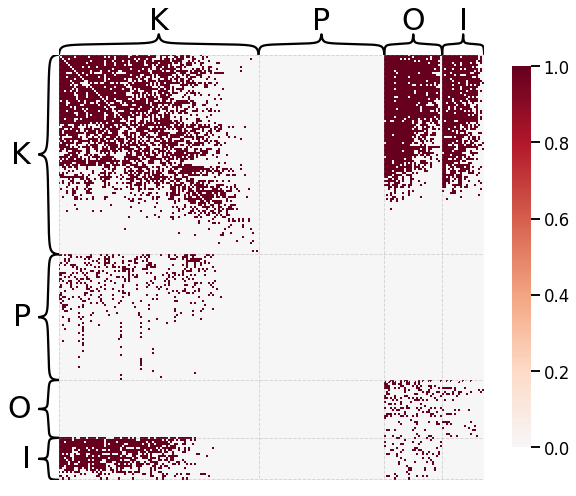

In [14]:
import numpy as np
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize
%matplotlib inline

adj, label = load_drosophila_right(return_labels=True)
adj = binarize(adj)
heatmap(adj,
        inner_hier_labels=label,
        font_scale=1,
        sort_nodes=True);

**Notes**: `binarize()` is not included in the documentation but in the `utils` [source code](https://graspy.neurodata.io/_modules/graspy/utils/utils.html). Basically, it turns non-zero values into 1 and makes the matrix binary.

(Also since the graph is directed, there're many connections from K to O but not from O to K?)

## Models

### Erdos-Reyni (ER)

$$P_{ij} = p$$

For any node $i$ and $j$, the probability that they are connected is always $p$.

ER "p" parameter: 0.1661046088739007


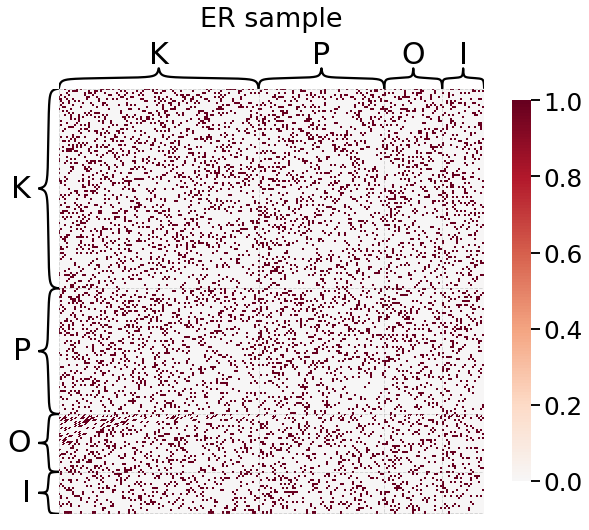

In [17]:
from graspy.models import EREstimator
er = EREstimator(directed=True,loops=False)
er.fit(adj)
print(f"ER \"p\" parameter: {er.p_}")

heatmap(er.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="ER sample",
        sort_nodes=True);

`p_` represents the prob of any edge. In ER, the color is all the same because $p$ is fixed.

<font color='red'>**Question**</font>: What determines $p$? Loaded from the dataset or decided by the model?

### Degree-corrected Erdos-Reyni (DCER)

$$P_{ij} = \theta_{i}\theta_{j}p$$

where $\theta_i$ represents the **expected** degree of node $i$. (i.e. if both nodes $i$ and $j$ are expected to be densely connected, then it's more likely for them to form connections compared to those with a lower expected degree)

DCER "p" parameter: 7536.0


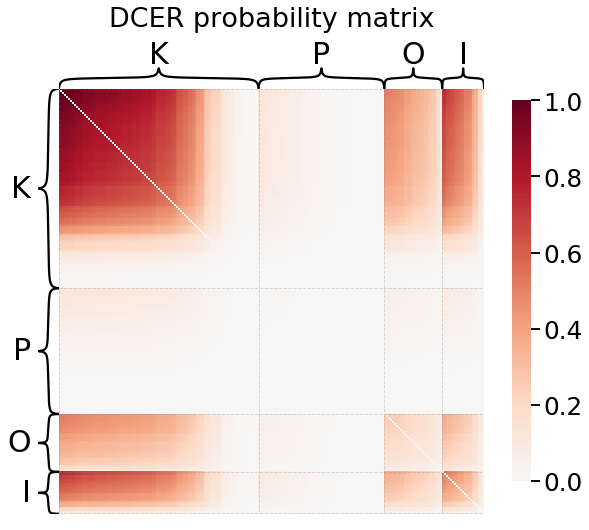

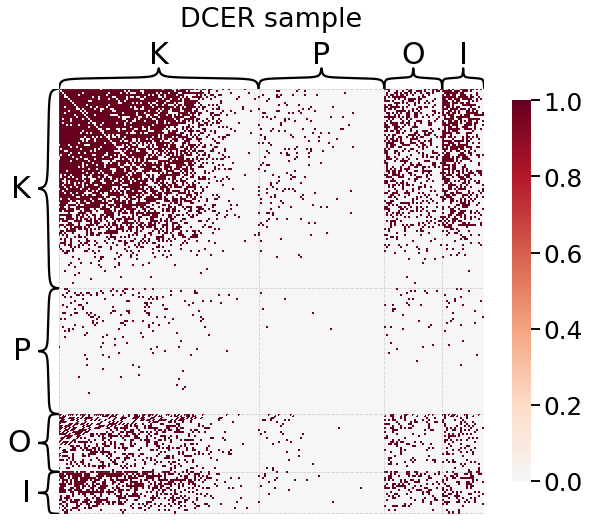

In [19]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True,loops=False)
dcer.fit(adj)
print(f"DCER \"p\" parameter: {dcer.p_}")
heatmap(dcer.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="DCER probability matrix",
        sort_nodes=True);
heatmap(dcer.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="DCER sample",
        sort_nodes=True);

**Question**: `p_` $> 1$?

### Stochastic block model (SBM)

$$P_{ij} = B_{\tau_i \tau_j}$$

where $\tau_i, \tau_j \in K, K\subset [0, k]^{1\times N}$ (the lookup table of where a node belong to when there're k blocks). $B\subset [0,1]^{k\times k}$ is the matrix for connection probability between blocks. 

Each node belongs to a block. Prob [$i $ connected to $j$] is solely determined by the connection between 2 blocks. (Potential problem: ignore the uniqueness of each node within the block).

Note that Prob [$K $ connected to $K$] is non-zero $\Rightarrow$ SBM also reflects connection within blocks.

SBM "B" matrix:
[[0.         0.38333333 0.11986864 0.        ]
 [0.44571429 0.3584     0.49448276 0.        ]
 [0.09359606 0.         0.20095125 0.        ]
 [0.         0.07587302 0.         0.        ]]


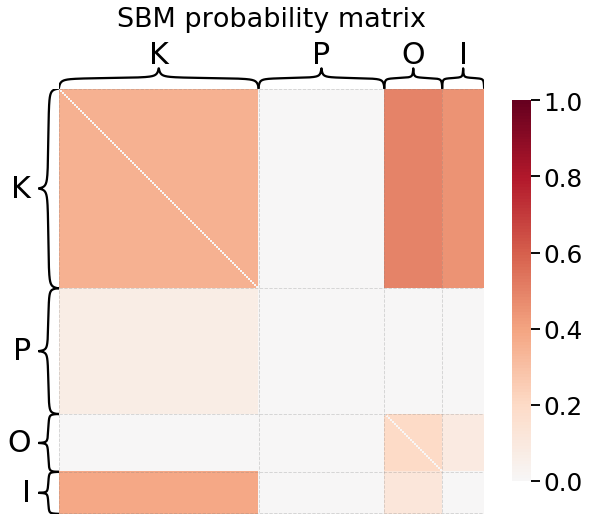

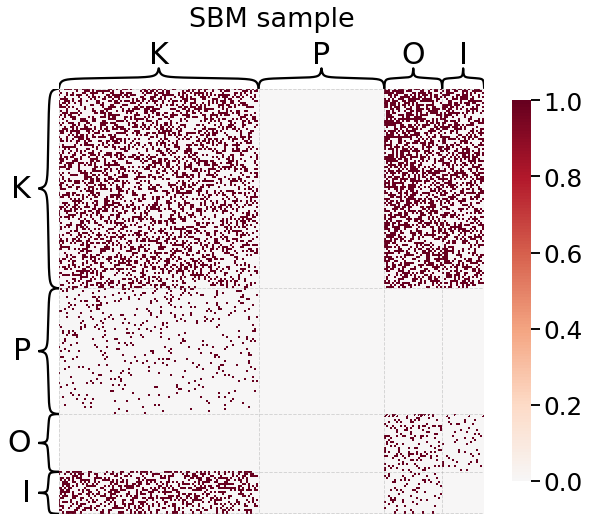

In [20]:
from graspy.models import SBMEstimator
sbme = SBMEstimator(directed=True,loops=False)
sbme.fit(adj, y=labels)
print("SBM \"B\" matrix:")
print(sbme.block_p_)
heatmap(sbme.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="SBM probability matrix",
        sort_nodes=True)
heatmap(sbme.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="SBM sample",
        sort_nodes=True);

### Random dot product graph (RDPG)

$$P_{ij} = \langle x_i, x_j \rangle$$

The probability to have a connection with another node is transformed to a vector in an Euclidian space. $x_i$ and $x_j$ are two $latent\: positions$ for $i$ and $j$.

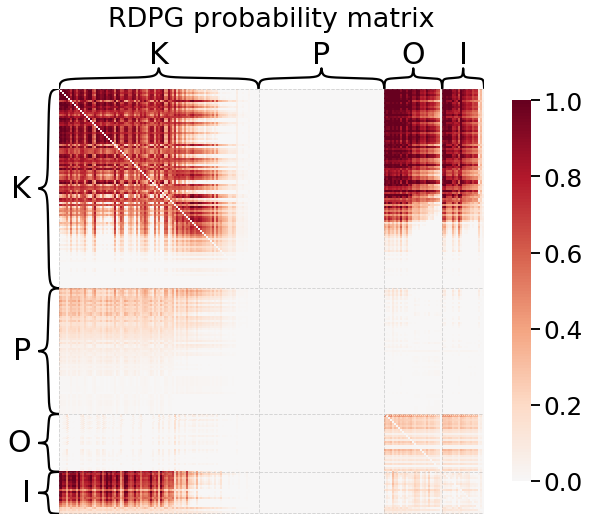

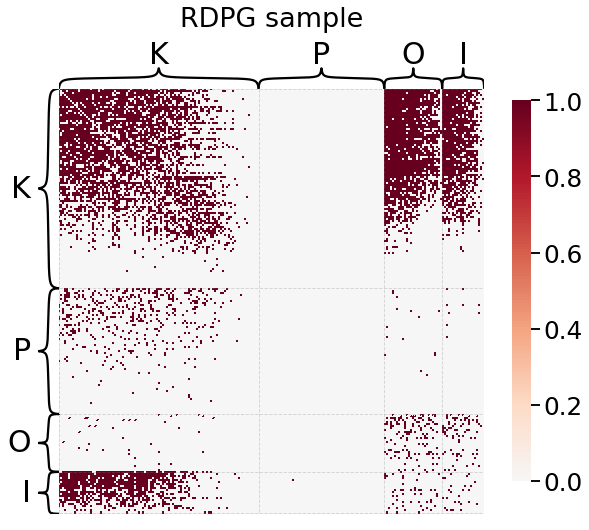

In [21]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)
heatmap(rdpge.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="RDPG probability matrix",
        sort_nodes=True
       )
heatmap(rdpge.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="RDPG sample",
        sort_nodes=True);

<font color='red'>**Question**</font>: Why would the shape be like this?